In [1]:
import cv2
import keras
import glob
import numpy as np
from scipy.stats import pearsonr
from sklearn.metrics import mutual_info_score, normalized_mutual_info_score
import matplotlib.pyplot as plt

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def read_all_csvs(activation_dir):
    all_files = sorted(glob.glob(activation_dir))
    all_comparisons = np.zeros((50000, len(all_files)))
    for i, comp_file in enumerate(all_files):
        current_comp = np.loadtxt(comp_file, delimiter=',')
        all_comparisons[:, i] = current_comp[:, 0]
    return (all_comparisons, all_files)

In [10]:
activation_dir_100 = '/home/arash/Desktop/giessen/good/2pair_comparisons/restnet50_org_cv_100/*.csv'
activation_dir_015 = '/home/arash/Desktop/giessen/good/2pair_comparisons/restnet50_org_cv_015/*.csv'

(all_comparisons_100, files_100) = read_all_csvs(activation_dir_100)
(all_comparisons_015, files_015) = read_all_csvs(activation_dir_015)

In [4]:
np.savetxt('all_comparisons_resnet_100.csv', all_comparisons_100, delimiter=',')
np.savetxt('all_comparisons_resnet_015.csv', all_comparisons_015, delimiter=',')

In [3]:
# reading prediction results
prediction_dir = '/home/arash/Desktop/giessen/good/2pair_comparisons/predictions/*.csv'
(prediction_results, predidtion_files) = read_all_csvs(prediction_dir)

In [8]:
res3c_branch2c_dir = '/home/arash/Software/repositories/kernelphysiology/python/src/kernelphysiology/dl/keras/org_cv/layer_066_res3c_branch2c.csv'
res3c_branch2c_kernels = np.loadtxt(res3c_branch2c_dir, delimiter=',')
res3c_branch2c_kernels.shape

(50000, 12)

In [12]:
res3c_branch2c_file_diff = '/home/arash/Software/repositories/kernelphysiology/python/src/kernelphysiology/dl/keras/org_cv/layer_066_res3c_branch2c_diff.csv'
res3c_branch2c_kernels_diff = np.loadtxt(res3c_branch2c_file_diff, delimiter=',')
res3c_branch2c_kernels_diff.shape

(50000, 12)

In [18]:
def find_layer_index(files, layer_name):
    for i, f in enumerate(files):
        if layer_name in f:
            return i

In [19]:
layer_name = 'res3c_branch2c'
i015 = find_layer_index(files_015, layer_name)
i100 = find_layer_index(files_100, layer_name)
print(i015, i100)

20 66


In [24]:
act_015 = all_comparisons_015[:, i015]
act_100 = all_comparisons_100[:, i100]

In [26]:
condition = np.logical_and(prediction_results[:, 0] == 1.0, prediction_results[:, 2] == 0.0)
which_results_015 = act_015[condition]
which_results_100 = act_100[condition]
print(which_results_015.mean(), which_results_100.mean())

0.788384599969466 0.9246515160683401


[-0.00360833 -0.00152585  0.02305092  0.00028013  0.01324109 -0.02115536
 -0.00301876  0.01080281 -0.02851263  0.01344412 -0.00411215  0.01025636]


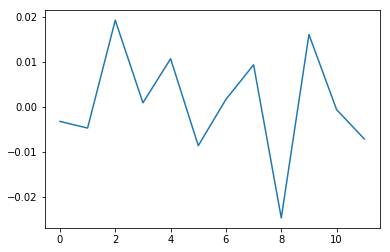

In [21]:
condition = np.logical_and(prediction_results[:, 0] == 1.0, prediction_results[:, 2] == 0.0)
which_results = res3c_branch2c_kernels_diff[condition, :]
print(which_results.mean(axis=0))
plt.plot(np.median(which_results, axis=0))

[-0.00377325 -0.00136331  0.02314149  0.00021911  0.01357015 -0.02225904
 -0.00358331  0.01102384 -0.02896901  0.01352235 -0.00447533  0.01202143]


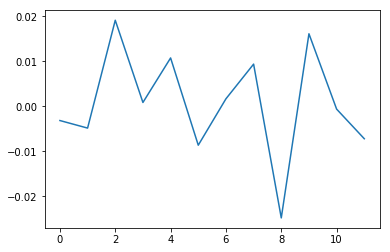

In [22]:
condition = np.logical_and(prediction_results[:, 0] == 0.0, prediction_results[:, 2] == 0.0)
which_results = res3c_branch2c_kernels_diff[condition, :]
print(which_results.mean(axis=0))
plt.plot(np.median(which_results, axis=0))

[-0.00409175 -0.00070983  0.02422872 -0.00013004  0.01424053 -0.02519445
 -0.00473368  0.01129005 -0.02967198  0.01337564 -0.00526733  0.01598021]


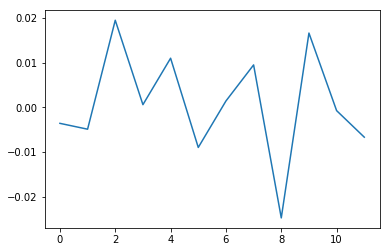

In [23]:
condition = np.logical_and(prediction_results[:, 0] == 1.0, prediction_results[:, 2] == 1.0)
which_results = res3c_branch2c_kernels_diff[condition, :]
print(which_results.mean(axis=0))
plt.plot(np.median(which_results, axis=0))